## Task 1

In [5]:
import pandas as pd
non_parametric_data = pd.read_csv('non_parametric_tests_data.csv')
print("Non-Parametric Dataset Summary:")
print(non_parametric_data.describe())
print(f"Non-Parametric Dataset Duplicates: {non_parametric_data.duplicated().sum()}")


Non-Parametric Dataset Summary:
       Customer_ID  Satisfaction_Score  Satisfaction_Before  \
count   100.000000          100.000000           100.000000   
mean     50.500000            5.377319             5.650365   
std      29.011492            2.707247             2.685168   
min       1.000000            1.049699             1.045554   
25%      25.750000            3.197518             3.171517   
50%      50.500000            5.347047             6.055792   
75%      75.250000            7.943626             7.752461   
max     100.000000            9.881982             9.870854   

       Satisfaction_After  Median_Income      Diet_A      Diet_B      Diet_C  
count          100.000000     100.000000  100.000000  100.000000  100.000000  
mean             5.657554   52020.482924  118.141300  125.039539  128.500916  
std              2.865729    4702.210221   15.374422   15.008179   15.639873  
min              0.145554   41442.469241   85.471183   87.925332   89.546700  
25%  

## Mann-Whitney U Test

In [17]:

group_a = non_parametric_data['Diet_A']
group_b = non_parametric_data['Diet_B']
statistic, p_value = mannwhitneyu(group_a, group_b, alternative='two-sided')

print(f"Mann-Whitney U Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis (H₀): The distributions of Satisfaction_After differ between the two diet groups.")
else:
    print("Fail to reject the null hypothesis (H₀): No significant difference between the distributions of Satisfaction_After in the two diet groups.")


Mann-Whitney U Statistic: 3647.0
P-value: 0.0009508371922247861
Reject the null hypothesis (H₀): The distributions of Satisfaction_After differ between the two diet groups.


## wilcoxon signed-rank

In [18]:
from scipy.stats import wilcoxon

# Wilcoxon signed-rank test for satisfaction scores before and after
stat, p_value = wilcoxon(
    non_parametric_data["Satisfaction_Before"],
    non_parametric_data["Satisfaction_After"]
)

print(f"Wilcoxon Test Statistic: {stat}")
print(f"Wilcoxon p-value: {p_value}")

Wilcoxon Test Statistic: 2505.0
Wilcoxon p-value: 0.9451754865571346


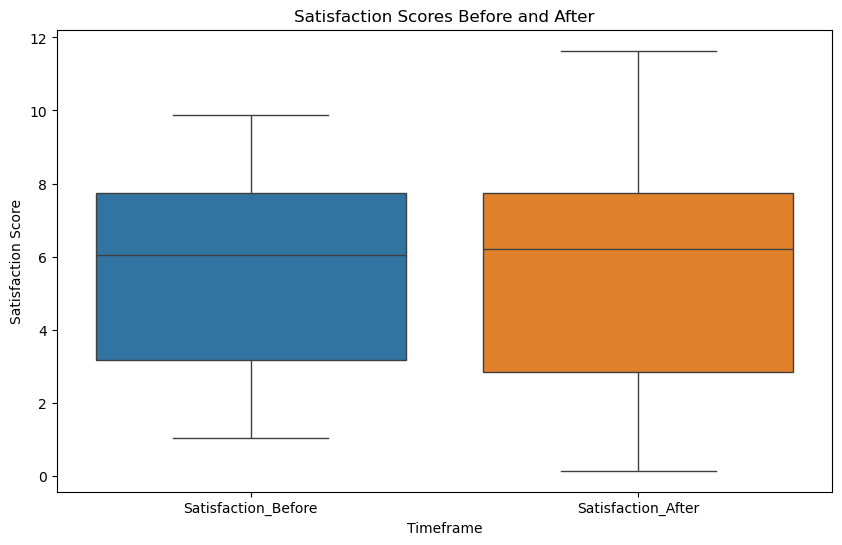

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=non_parametric_data[["Satisfaction_Before", "Satisfaction_After"]])
plt.title("Satisfaction Scores Before and After")
plt.ylabel("Satisfaction Score")
plt.xlabel("Timeframe")
plt.show()


## end